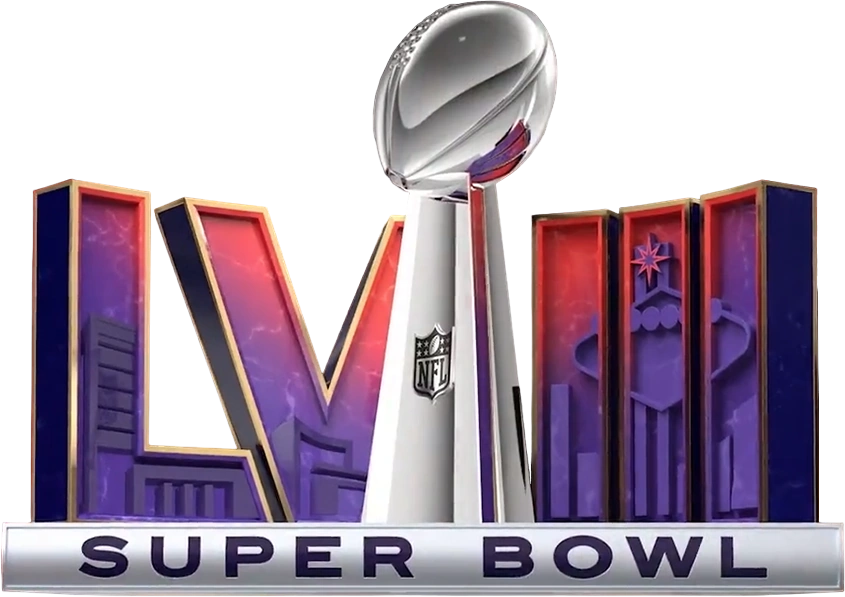

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

In [10]:
url = 'https://es.wikipedia.org/wiki/Anexo:Espectáculos_de_medio_tiempo_del_Super_Bowl#:~:text=Con%20ello%2C%20los%20años%202010,y%20Maroon%205%20en%202019.'
response = requests.get(url)
response

<Response [200]>

In [11]:
# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Parsear el contenido HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Encontrar todos los elementos que contienen los títulos de los artículos
    titles = soup.find_all('th')
    
    # Imprimir los títulos de los artículos
    for title in titles:
        print(title.text)
else:
    print('Error al obtener la página:', response.status_code)

Edición

Fecha

Localización

Artista(s)

Productor

Tema / Repertorio

Ref.

Edición

Fecha

Localización

Artista(s)

Productor

Patrocinador

Tema / Repertorio

Ref.

Edición

Fecha

Localización

Artista(s)

Productor

Patrocinador

Tema / Repertorio

Ref.

Edición

Fecha

Localización

Artista(s)

Productor

Patrocinador

Tema / Repertorio

Ref.

Edición

Fecha

Localización

Artista(s)

Productor

Patrocinador

Tema / Repertorio

Ref.

Edición(AP)

Fecha

Localización

Artista(s)

Productor

Director

Patrocinador

Tema / Repertorio

Ref.

Edición(AP)

Fecha

Localización

Artista(s)

Productor

Director

Patrocinador

Tema / Repertorio

Ref.



In [12]:
if response.status_code == 200:
    # Parsear el contenido HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Encontrar todas las tablas en la página
    tables = soup.find_all('table')
    
    # Iterar sobre todas las tablas
    for table in tables:
        # Encontrar todas las filas (tr) de la tabla
        rows = table.find_all('tr')
        
        # Iterar sobre todas las filas
        for row in rows:
            # Encontrar todas las celdas (td) en la fila
            cells = row.find_all(['td', 'th'])
            
            # Imprimir el contenido de cada celda
            for cell in cells:
                print(cell.text.strip())
            print('---')  # Separador entre filas para mayor claridad
else:
    print('Error al obtener la página:', response.status_code)


Edición
Fecha
Localización
Artista(s)
Productor
Tema / Repertorio
Ref.
---
I
15 de enero de 1967
Los Angeles Memorial Coliseum(Los Ángeles, California)
Banda sinfónica de la Universidad de Arizona
Banda de marcha de la Universidad Estatal de Grambling
Al Hirt
Anaheim High School Drill Team and Flag Girls
Tommy Walker
«The Liberty Bell» (Banda sinfónica de la Universidad de Arizona)
[5]​[6]​[7]​
---
II
14 de enero de 1968
Miami Orange Bowl(Miami, Florida)
Banda de marcha de la Universidad Estatal de Grambling
No disponible
No disponible
[5]​
---
III
12 de enero de 1969
Universidad Agrónoma y Mecánica de Florida
Bandas de escuelas secundarias de Miami
America Thanks
[5]​
---
Edición
Fecha
Localización
Artista(s)
Productor
Patrocinador
Tema / Repertorio
Ref.
---
IV
11 de enero de 1970
Tulane Stadium(Nueva Orleans, Luisiana)
Doc Severinsen
Al Hirt
Lionel Hampton
Banda de marcha de la Universidad del Sur
No disponible
No disponible
Tribute to Mardi Gras
[5]​
---
V
17 de enero de 1971
Miami 

In [15]:
import csv 

In [30]:

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    tabla = soup.find('table')
    
    # Comprobar si se encontró la tabla
    if tabla:
        # Inicializar una lista para almacenar los datos de la tabla
        datos_tabla = []
        
        # Encontrar todas las filas de la tabla
        filas = tabla.find_all('tr')
        
        # Iterar sobre las filas
        for fila in filas:
            # Inicializar una lista para almacenar los datos de la fila
            datos_fila = []
            
            # Encontrar todas las celdas de la fila
            celdas = fila.find_all(['th', 'td'])
            
            # Iterar sobre las celdas
            for celda in celdas:
                # Extraer el texto de la celda y eliminar los espacios en blanco al principio y al final
                texto_celda = celda.get_text(strip=True)
                
                # Si el texto está vacío, agregar None a la lista de datos de la fila
                if not texto_celda:
                    datos_fila.append(None)
                else:
                    datos_fila.append(texto_celda)

            # Agregar los datos de la fila a la lista de datos de la tabla
            datos_tabla.append(datos_fila)
        
        # Escribir los datos en un archivo CSV
        with open('datos_super_bowl.csv', 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerows(datos_tabla)
            
            # Agregar los datos de la fila a la lista de datos de la tabla
            datos_tabla.append(datos_fila)
        
        # Imprimir los datos de la tabla
        for fila in datos_tabla:
            print(fila)
    else:
        print('No se encontró ninguna tabla en la página.')
else:
    print('Error al realizar la solicitud a la página:', response.status_code)


['Edición', 'Fecha', 'Localización', 'Artista(s)', 'Productor', 'Tema / Repertorio', 'Ref.']
['I', '15 de enero de 1967', 'Los Angeles Memorial Coliseum(Los Ángeles,California)', 'Banda sinfónica de laUniversidad de ArizonaBanda de marcha de la Universidad Estatal de GramblingAl HirtAnaheim High School Drill Team and Flag Girls', 'Tommy Walker', '«The Liberty Bell»(Banda sinfónica de la Universidad de Arizona)', '[5]\u200b[6]\u200b[7]\u200b']
['II', '14 de enero de 1968', 'Miami Orange Bowl(Miami,Florida)', 'Banda de marcha de la Universidad Estatal de Grambling', 'No disponible', 'No disponible', '[5]\u200b']
['III', '12 de enero de 1969', 'Universidad Agrónoma y Mecánica de FloridaBandas de escuelas secundarias de Miami', 'America Thanks', '[5]\u200b']
['III', '12 de enero de 1969', 'Universidad Agrónoma y Mecánica de FloridaBandas de escuelas secundarias de Miami', 'America Thanks', '[5]\u200b']


In [29]:
df1 = pd.read_csv('datos_super_bowl.csv')
df1.head()

,Edición,Fecha,Localización,Artista(s),Productor,Tema / Repertorio,Ref.
0,I,15 de enero de 1967,"Los Angeles Memorial Coliseum(Los Ángeles,Cali...",Banda sinfónica de laUniversidad de ArizonaBan...,Tommy Walker,«The Liberty Bell»(Banda sinfónica de la Unive...,[5]​[6]​[7]​
1,II,14 de enero de 1968,"Miami Orange Bowl(Miami,Florida)",Banda de marcha de la Universidad Estatal de G...,No disponible,No disponible,[5]​
2,III,12 de enero de 1969,Universidad Agrónoma y Mecánica de FloridaBand...,America Thanks,[5]​,NaN,NaN


In [31]:
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    # Encontrar todas las tablas en la página
    tablas = soup.find_all('table')
    
    # Comprobar si se encontraron tablas
    if tablas:
        # Iterar sobre cada tabla encontrada
        for tabla in tablas:
            # Inicializar una lista para almacenar los datos de la tabla
            datos_tabla = []
            
            # Encontrar todas las filas de la tabla
            filas = tabla.find_all('tr')
            
            # Iterar sobre las filas
            for fila in filas:
                # Inicializar una lista para almacenar los datos de la fila
                datos_fila = []
                
                # Encontrar todas las celdas de la fila
                celdas = fila.find_all(['th', 'td'])
                
                # Iterar sobre las celdas
                for celda in celdas:
                    # Extraer el texto de la celda y eliminar los espacios en blanco al principio y al final
                    texto_celda = celda.get_text(strip=True)
                    
                    # Si el texto está vacío, agregar None a la lista de datos de la fila
                    if not texto_celda:
                        datos_fila.append(None)
                    else:
                        datos_fila.append(texto_celda)
                
                # Agregar los datos de la fila a la lista de datos de la tabla
                datos_tabla.append(datos_fila)
            
            # Escribir los datos de la tabla actual en un archivo CSV
            with open(f'datos_tabla_{tablas.index(tabla)}.csv', 'w', newline='', encoding='utf-8') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerows(datos_tabla)
                
                # Imprimir los datos de la tabla actual
                print(f'Datos de la tabla {tablas.index(tabla) + 1}:')
                for fila in datos_tabla:
                    print(fila)
                print('----------------------------------------')
    else:
        print('No se encontraron tablas en la página.')
else:
    print('Error al realizar la solicitud a la página:', response.status_code)


Datos de la tabla 1:
['Edición', 'Fecha', 'Localización', 'Artista(s)', 'Productor', 'Tema / Repertorio', 'Ref.']
['I', '15 de enero de 1967', 'Los Angeles Memorial Coliseum(Los Ángeles,California)', 'Banda sinfónica de laUniversidad de ArizonaBanda de marcha de la Universidad Estatal de GramblingAl HirtAnaheim High School Drill Team and Flag Girls', 'Tommy Walker', '«The Liberty Bell»(Banda sinfónica de la Universidad de Arizona)', '[5]\u200b[6]\u200b[7]\u200b']
['II', '14 de enero de 1968', 'Miami Orange Bowl(Miami,Florida)', 'Banda de marcha de la Universidad Estatal de Grambling', 'No disponible', 'No disponible', '[5]\u200b']
['III', '12 de enero de 1969', 'Universidad Agrónoma y Mecánica de FloridaBandas de escuelas secundarias de Miami', 'America Thanks', '[5]\u200b']
----------------------------------------
Datos de la tabla 2:
['Edición', 'Fecha', 'Localización', 'Artista(s)', 'Productor', 'Patrocinador', 'Tema / Repertorio', 'Ref.']
['IV', '11 de enero de 1970', 'Tulane Stadi

In [35]:
df0 = pd.read_csv('datos_tabla_0.csv')
df0.head()

,Edición,Fecha,Localización,Artista(s),Productor,Tema / Repertorio,Ref.
0,I,15 de enero de 1967,"Los Angeles Memorial Coliseum(Los Ángeles,Cali...",Banda sinfónica de laUniversidad de ArizonaBan...,Tommy Walker,«The Liberty Bell»(Banda sinfónica de la Unive...,[5]​[6]​[7]​
1,II,14 de enero de 1968,"Miami Orange Bowl(Miami,Florida)",Banda de marcha de la Universidad Estatal de G...,No disponible,No disponible,[5]​
2,III,12 de enero de 1969,Universidad Agrónoma y Mecánica de FloridaBand...,America Thanks,[5]​,NaN,NaN


In [36]:
df1 = pd.read_csv('datos_tabla_1.csv')
df1.head()

,Edición,Fecha,Localización,Artista(s),Productor,Patrocinador,Tema / Repertorio,Ref.
0,IV,11 de enero de 1970,"Tulane Stadium(Nueva Orleans,Luisiana)",Doc SeverinsenAl HirtLionel HamptonBanda de ma...,No disponible,No disponible,Tribute toMardi Gras,[5]​
1,V,17 de enero de 1971,"Miami Orange Bowl(Miami,Florida)",Banda de marcha de la Universidad Estatal del ...,No disponible,[5]​[8]​,NaN,NaN
2,VI,16 de enero de 1972,"Tulane Stadium(Nueva Orleans, Luisiana)",Ella FitzgeraldCarol ChanningAl HirtCoro de ca...,Jim Skinner,Salute toLouis Armstrong/«Mack the Knife»(Ella...,[5]​[9]​,NaN
3,VII,14 de enero de 1973,"Los Angeles Memorial Coliseum(Los Ángeles,Cali...",Banda de marcha de laUniversidad de MíchiganWo...,Tommy Walker,Happiness Is,[5]​,NaN
4,VIII,13 de enero de 1974,"Rice Stadium(Houston,Texas)",Banda de marcha de laUniversidad de TexasViolí...,Jim Skinner,A Musical America,[5]​,NaN


In [41]:
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    tablas = soup.find_all('table')
    
    # Comprobar si se encontraron tablas
    if tablas:
        # Verificar si hay al menos dos tablas presentes
        if len(tablas) >= 3:
            tabla = tablas[2]  # Seleccionar la segunda tabla (índice 1)
            
            # Inicializar una lista para almacenar los datos de la tabla
            datos_tabla = []
            
            # Encontrar todas las filas de la tabla
            filas = tabla.find_all('tr')
            
            # Iterar sobre las filas
            for fila in filas:
                # Inicializar una lista para almacenar los datos de la fila
                datos_fila = []
                
                # Encontrar todas las celdas de la fila
                celdas = fila.find_all(['th', 'td'])
                
                # Iterar sobre las celdas
                for celda in celdas:
                    # Extraer el texto de la celda y eliminar los espacios en blanco al principio y al final
                    texto_celda = celda.get_text(strip=True)
                    
                    # Si el texto está vacío, agregar None a la lista de datos de la fila
                    if not texto_celda:
                        datos_fila.append(None)
                    else:
                        datos_fila.append(texto_celda)
                
                # Agregar los datos de la fila a la lista de datos de la tabla
                datos_tabla.append(datos_fila)
            
            # Escribir los datos en un archivo CSV
            with open('datos_tabla_demo2.csv', 'w', newline='', encoding='utf-8') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerows(datos_tabla)
                
                # Imprimir los datos de la tabla
                for fila in datos_tabla:
                    print(fila)
        else:
            print('No se encontraron suficientes tablas en la página.')
    else:
        print('No se encontraron tablas en la página.')
else:
    print('Error al realizar la solicitud a la página:', response.status_code)


['Edición', 'Fecha', 'Localización', 'Artista(s)', 'Productor', 'Patrocinador', 'Tema / Repertorio', 'Ref.']
['XIV', '20 de enero de 1980', 'Rose Bowl(Pasadena,California)', 'Up With PeopleBanda de marcha de la Universidad Estatal de Grambling', 'No disponible', 'No disponible', 'A Salute to theBig BandEra', '[5]\u200b[10]\u200b']
['XV', '25 de enero de 1981', 'Louisiana Superdome(Nueva Orleans,Luisiana)', "Banda de marcha de la Universidad del SurHelen O'Connell", 'Jim Skinner', 'No disponible', 'Mardi GrasFestival', '[5]\u200b']
['XVI', '24 de enero de 1982', 'Pontiac Silverdome(Pontiac,Míchigan)', 'Up with People', 'No disponible', 'No disponible', 'Salute to the 1960s andMotown', '[5]\u200b[10]\u200b']
['XVII', '30 de enero de 1983', 'Rose Bowl(Pasadena, California)', 'Los Angeles Super Drill Team', 'Bob Jani', 'No disponible', 'KaleidoSUPERscope', '[5]\u200b']
['XVIII', '22 de enero de 1984', 'Tampa Stadium(Tampa,Florida)', 'Universidad de la FloridaBanda de marcha de laUniversida

In [39]:
dfdemo = pd.read_csv('datos_tabla_demo2.csv', index_col=0)
dfdemo

,Fecha,Localización,Artista(s),Productor,Patrocinador,Tema / Repertorio,Ref.
Edición,,,,,,,
IV,11 de enero de 1970,"Tulane Stadium(Nueva Orleans,Luisiana)",Doc SeverinsenAl HirtLionel HamptonBanda de ma...,No disponible,No disponible,Tribute toMardi Gras,[5]​
V,17 de enero de 1971,"Miami Orange Bowl(Miami,Florida)",Banda de marcha de la Universidad Estatal del ...,No disponible,[5]​[8]​,NaN,NaN
VI,16 de enero de 1972,"Tulane Stadium(Nueva Orleans, Luisiana)",Ella FitzgeraldCarol ChanningAl HirtCoro de ca...,Jim Skinner,Salute toLouis Armstrong/«Mack the Knife»(Ella...,[5]​[9]​,NaN
VII,14 de enero de 1973,"Los Angeles Memorial Coliseum(Los Ángeles,Cali...",Banda de marcha de laUniversidad de MíchiganWo...,Tommy Walker,Happiness Is,[5]​,NaN
VIII,13 de enero de 1974,"Rice Stadium(Houston,Texas)",Banda de marcha de laUniversidad de TexasViolí...,Jim Skinner,A Musical America,[5]​,NaN
IX,12 de enero de 1975,"Tulane Stadium(Nueva Orleans, Luisiana)",Mercer EllingtonBanda de marcha de la Universi...,Tribute toDuke Ellington,[5]​[7]​,NaN,NaN
X,18 de enero de 1976,"Miami Orange Bowl(Miami, Florida)",Up With People,No disponible,200 Years and Just a Baby: A Tribute toAmerica...,[5]​[10]​,NaN
XI,9 de enero de 1977,"Rose Bowl(Pasadena, California)",Banda de marcha unificada de Los ÁngelesPartic...,The Walt Disney Company,It's a Small World,[5]​,NaN
XII,15 de enero de 1978,"Louisiana Superdome(Nueva Orleans, Luisiana)",Majorettesdel Tyler Junior CollegeBanda de Pet...,No disponible,From Paris to Paris of America,[5]​,NaN
